In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200


import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
annual_df = pd.read_csv('annual-number-of-births-by-world-region.csv',parse_dates=['Year'])

annual_df.tail()

,Entity,Code,Year,"Estimates, 1950 - 2015: Demographic Indicators - Births (thousands) (thousands)"
15901,Zimbabwe,ZWE,2011-01-01,519607.0
15902,Zimbabwe,ZWE,2012-01-01,526681.0
15903,Zimbabwe,ZWE,2013-01-01,531609.0
15904,Zimbabwe,ZWE,2014-01-01,534424.0
15905,Zimbabwe,ZWE,2015-01-01,535370.0


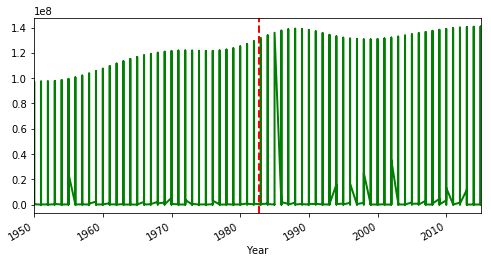

In [3]:
f,ax = plt.subplots(1,1,figsize=(8,4))


annual_df.set_index('Year')['Estimates, 1950 - 2015: Demographic Indicators - Births (thousands) (thousands)'].plot(c='g',lw=2,ax=ax)

ax.axvline(pd.Timestamp('1982-09-01'),color='r',ls='--',lw=2)

In [5]:
china_annual_df=annual_df.loc[annual_df["Code"] == "CHN"]
china_annual_df.head()

,Entity,Code,Year,"Estimates, 1950 - 2015: Demographic Indicators - Births (thousands) (thousands)"
2772,China,CHN,1950-01-01,26750120.0
2773,China,CHN,1951-01-01,26020056.0
2774,China,CHN,1952-01-01,24714121.0
2775,China,CHN,1953-01-01,23716569.0
2776,China,CHN,1954-01-01,23027400.0


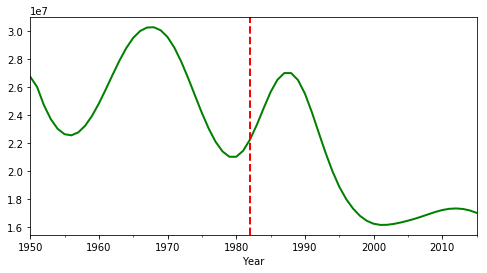

In [6]:
f,ax = plt.subplots(1,1,figsize=(8,4))


china_annual_df.set_index('Year')['Estimates, 1950 - 2015: Demographic Indicators - Births (thousands) (thousands)'].plot(c='g',lw=2,ax=ax)

ax.axvline(pd.Timestamp('1982-09-01'),color='r',ls='--',lw=2)

In [8]:
birth_df = pd.read_csv('sex-ratio-at-birth.csv',parse_dates=['Year'])

birth_df.tail()

,Entity,Code,Year,Sex ratio at birth (male births per female births) (male births per 100 female births)
4977,Zimbabwe,ZWE,2013-01-01,102.0
4978,Zimbabwe,ZWE,2014-01-01,102.0
4979,Zimbabwe,ZWE,2015-01-01,102.0
4980,Zimbabwe,ZWE,2016-01-01,102.0
4981,Zimbabwe,ZWE,2017-01-01,102.0


In [9]:
china_df=birth_df.loc[birth_df["Code"] == "CHN"]
china_df

,Entity,Code,Year,Sex ratio at birth (male births per female births) (male births per 100 female births)
816,China,CHN,1962-01-01,107.0
817,China,CHN,1967-01-01,107.0
818,China,CHN,1972-01-01,107.0
819,China,CHN,1977-01-01,107.0
820,China,CHN,1982-01-01,107.0
821,China,CHN,1987-01-01,108.0
822,China,CHN,1990-01-01,110.4
823,China,CHN,1992-01-01,112.0
824,China,CHN,1997-01-01,114.0
825,China,CHN,2002-01-01,116.0


In [10]:
china_df['months_since_one_child'] = ((china_df['Year'] - pd.Timestamp('1982-09-01'))/pd.Timedelta(1,'M')).apply(np.round)
china_df.head()

/Users/yizhenwu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Entity,Code,Year,Sex ratio at birth (male births per female births) (male births per 100 female births),months_since_one_child
816,China,CHN,1962-01-01,107.0,-248.0
817,China,CHN,1967-01-01,107.0,-188.0
818,China,CHN,1972-01-01,107.0,-128.0
819,China,CHN,1977-01-01,107.0,-68.0
820,China,CHN,1982-01-01,107.0,-8.0


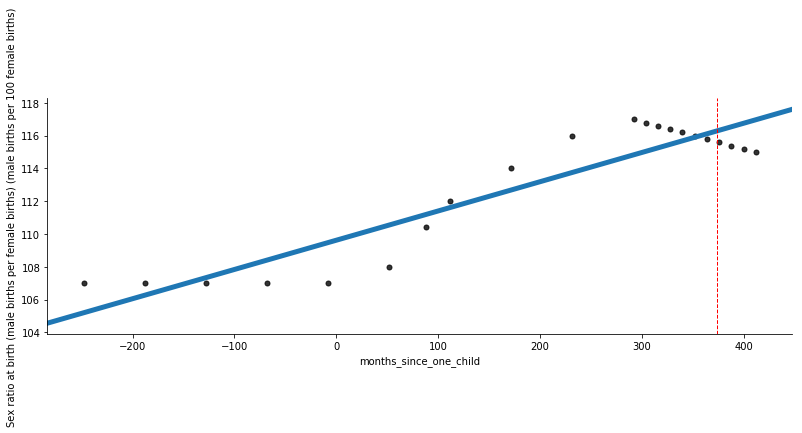

In [11]:
g = sb.lmplot(x='months_since_one_child',y='Sex ratio at birth (male births per female births) (male births per 100 female births)',data=china_df,aspect=2.25,ci=0,
              scatter_kws={'color':'k','s':25},line_kws={'lw':5})


ax = g.axes[0,0]

months_until_one_child = (pd.Timestamp('2011-11-01')-pd.Timestamp('1980-09-01'))/pd.Timedelta(1,'M')
ax.axvline(months_until_one_child,color='r',ls='--',lw=1)